<a href="https://colab.research.google.com/github/leihuang/scrapbook/blob/master/income_tax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Income tax brackets & rates

https://www.nerdwallet.com/blog/taxes/federal-income-tax-brackets/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
brackets_fed_2019 = np.array([0, 9701, 39475, 84201, 160725, 204101, 510300, 1000000])
taxrates_fed_2020 = np.array([10, 12, 22, 24, 32, 35, 37]) / 100

brackets_fed_2020 = np.array([0, 9875, 40125, 85525, 163300, 207350, 518400, 1000000])

brackets_fed_2021 = np.array([0, 9950, 40525, 86375, 164925, 209425, 523600, 1000000])

brackets_ca_2020 = np.array([0, 8932, 21175, 33421, 46394, 58634, 299508, 359407, 599012, 1e6])
taxrates_ca_2020 = np.array([1, 2, 4, 6, 8, 9.3, 10.3, 11.3, 12.3])

brackets = brackets_fed_2021
taxrates = taxrates_fed_2020

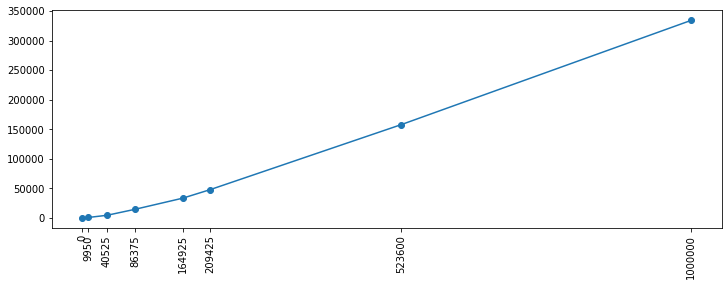

In [6]:
fig, ax = plt.subplots(figsize=(12,4))
x = brackets
y = (x[1:] - x[:-1]) * taxrates
ax.plot(x, [0]+np.cumsum(y).tolist(), '-o')
ax.set_xticks(brackets)
ax.set_xticklabels(brackets, rotation=90)
# ax.set_xscale('log')
plt.show()

In [ ]:
brackets, taxrates

(array([      0.,    8932.,   21175.,   33421.,   46394.,   58634.,
         299508.,  359407.,  599012., 1000000.]),
 array([ 1. ,  2. ,  4. ,  6. ,  8. ,  9.3, 10.3, 11.3, 12.3]))

In [7]:
def get_tax(income):
    tax = 0
    intervals = brackets[1:] - brackets[:-1]
    for interval, rate in zip(intervals, taxrates):        
        if income >= interval:
            tax = tax + interval * rate
            income = income - interval
        else:
            tax = tax + income * rate
            break
    return tax


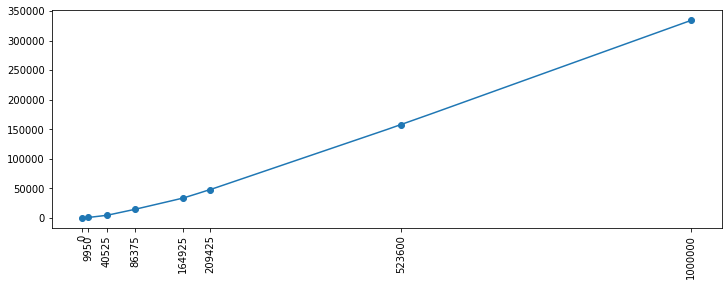

In [8]:
fig, ax = plt.subplots(figsize=(12,4))
x2 = np.logspace(0, np.log10(brackets[-1]), 101)
y2 = [get_tax(x_) for x_ in x2]
ax.plot(x2, y2, '-')
ax.scatter(x, [0]+np.cumsum(y).tolist())
ax.set_xticks(brackets)
ax.set_xticklabels(brackets, rotation=90)
# ax.set_xscale('log')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


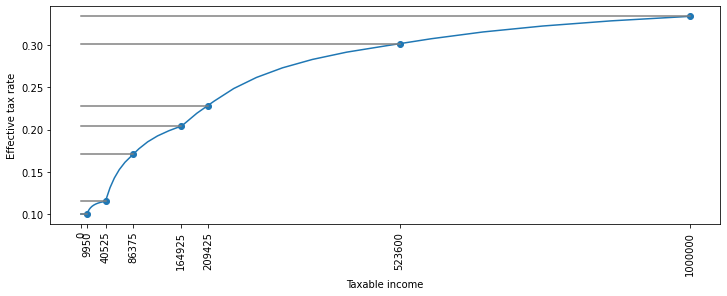

In [14]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x2, y2/x2, '-')
y3 = [get_tax(x_)/x_ for x_ in x]
ax.scatter(x, y3)
for x_, y_ in zip(x, y3):
    ax.plot([0, x_], [y_, y_], color='grey')
ax.set_xticks(brackets)
ax.set_xticklabels(brackets, rotation=90)
ax.set_xlabel('Taxable income')
ax.set_ylabel('Effective tax rate')
plt.show()

In [11]:
taxable_income = 186806
federal_income_tax_rate = get_tax(taxable_income) / taxable_income
get_tax(taxable_income), federal_income_tax_rate

(40604.92, 0.21736411036048092)

In [12]:
ss_tax_rate = 0.062
medicare_tax_rate = 0.0145

In [ ]:
get_tax(172127), get_tax(172127 - 12400)

(1313644.9000000001, 1198324.9)

In [13]:
federal_income_tax_rate + ss_tax_rate + medicare_tax_rate

0.29386411036048093